In [ ]:
#Importando librerias 
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Conectando a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Leemos el archivo excel de ventas de tiendas
df = pd.read_excel('/content/drive/MyDrive/Databases/Week 14/Superstore.xls')
#Filtramos por Furniture
muebles = df.loc[df['Category'] == 'Furniture']

In [ ]:
muebles.head(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [ ]:
#Obteniendo order date minimo y order date
muebles['Order Date'].min(),muebles['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [ ]:
#Nos quedamos con columnas que nos interesan para análisis
#de series de tiempo
cols = ['Row ID', 'Order ID', 'Ship Date',\
        'Ship Mode', 'Customer ID', 'Customer Name',\
        'Segment', 'Country', 'City', 'State', 'Postal Code',\
        'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',\
        'Quantity', 'Discount', 'Profit']
#Recrdemos que inplace = True lo que hace es asignar el resultado del deop
#al dataframe que estamos usando.
#sino fuera así, tendríamos que asignar a nuestro df este nuevo valor.        
muebles.drop(cols, axis=1, inplace=True)

#Validando si hay nulos en las columnas
muebles.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Order Date    0
Sales         0
dtype: int64

In [ ]:
muebles.head(2)

,Order Date,Sales
0,2016-11-08,261.96
1,2016-11-08,731.94


In [ ]:
#muebles = muebles.groupby(['Order Date'], as_index=False)['Sales'].sum()
#Agrupando ventas por mes, haciendo indice a order_date y reemplazando 
#el indice
muebles = muebles.groupby(['Order Date'], as_index=True).sum()

In [ ]:
muebles

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [ ]:
#Resampling es necesario cuando se le proporciona un conjunto de datos registrado en
# algún intervalo de tiempo y desea cambiar el intervalo de tiempo a otra cosa
#https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#MS es MONTHSTART, BH BusinessHOur, BMS, W, M
#Podemos agrupar por mean, sum, min, max
y = muebles['Sales'].resample('MS').mean()

In [ ]:
#filtrando por año de venta 
y['2014':]

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049187
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

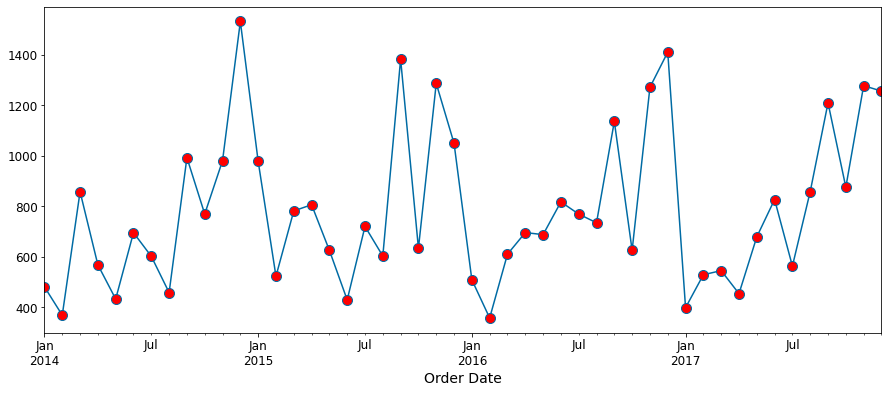

In [ ]:

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
fig = plt.figure(facecolor='w')
#Estilos de la graficas
#https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
# plt.style.use('fivethirtyeight')
plt.style.use('tableau-colorblind10')
y.plot(figsize=(15,6),marker="o",markersize=10,markerfacecolor='red')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


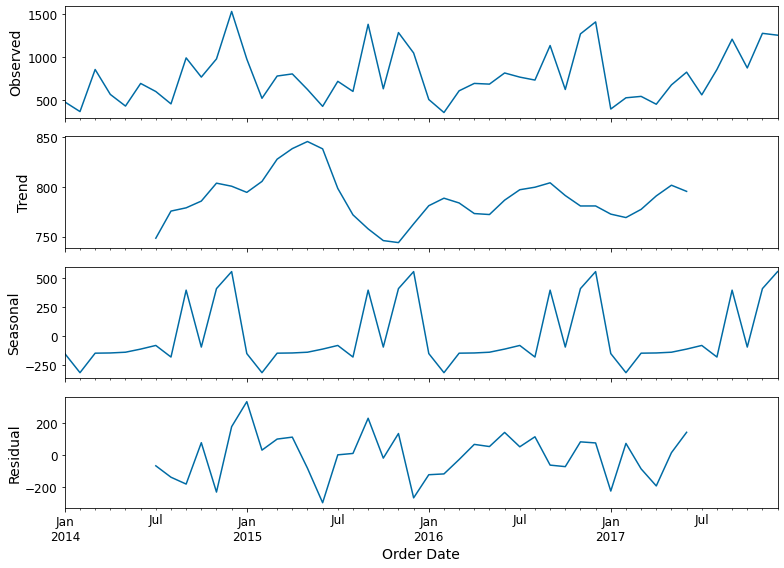

In [ ]:
# from pylab import rcParams
import statsmodels.api as sm

matplotlib.rcParams['figure.figsize'] = 11, 8
#Usamos tsa par obtener la función
#we use multiplicative models when the magnitude of the seasonal pattern 
#in the data depends on the magnitude of the data. On other hand, 
#in the additive model, the magnitude of seasonality does not change 
#in relation to time. 
decomposition_addi = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition_addi.plot()
plt.show()
#Level: The average value in the series.
#Trend: The increasing or decreasing value in the series.
#Seasonality: The repeating short-term cycle in the series.
#Noise: The random variation in the series.


In [ ]:
#Cuanto fluctua normalmente el precio según el mes a nivel de cantidad/unidades
#Esto es a nivel mensual, es decir bahamos aprox 149, no crecemos
decomposition_addi.seasonal['2017':]

Order Date
2017-01-01   -149.858992
2017-02-01   -313.772729
2017-03-01   -146.335750
2017-04-01   -144.492328
2017-05-01   -138.079245
2017-06-01   -111.255103
2017-07-01    -79.957342
2017-08-01   -179.492825
2017-09-01    394.908764
2017-10-01    -93.906432
2017-11-01    408.059330
2017-12-01    554.182652
Freq: MS, Name: Sales, dtype: float64

In [ ]:
decomposition = sm.tsa.seasonal_decompose(y,model='additive',freq=12, extrapolate_trend='freq')
fig =decomposition.plot()
plt.show()
https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

In [ ]:
#Aquí lo que se hace es una prueba estadística
#para ver si nuestros datos son estacionarios.
#Importamos adfuller (Augmented Dickey Fuller Test)
# La hipótesis nula de la prueba es que la serie de tiempo se puede representar por
# una raíz unitaria, que no es estacionaria (tiene alguna estructura dependiente del tiempo).
#La hipótesis alternativa (rechazando la hipótesis nula) es que la serie temporal es estacionaria.
from statsmodels.tsa.stattools import adfuller
print('Los datos son estacionarios?')
#llamamos nuestra funciónm, pasamos el campo de ventas de nuestros datos
dftest = adfuller(df.Sales, autolag=None)
#LAG en series de tiempo
print(f'Prueba estadistica {dftest[0]}')
print(f'P-value={dftest[1]}')
print(f'Valores criticos:')
for k, v in dftest[4].items():
    print('\t{}:{} Los datos son {} estacionarios con {}% de confianza'.format(k, v, "not" if v < dftest[0] else "", 100-int(k[:-1])))


Los datos son estacionarios?
Prueba estadistica -16.05147077671254
P-value=5.768292432873097e-29
Valores criticos:
	1%:-3.4310070554484553 Los datos son  estacionarios con 99% de confianza
	5%:-2.8618303792785476 Los datos son  estacionarios con 95% de confianza
	10%:-2.5669245637538687 Los datos son  estacionarios con 90% de confianza


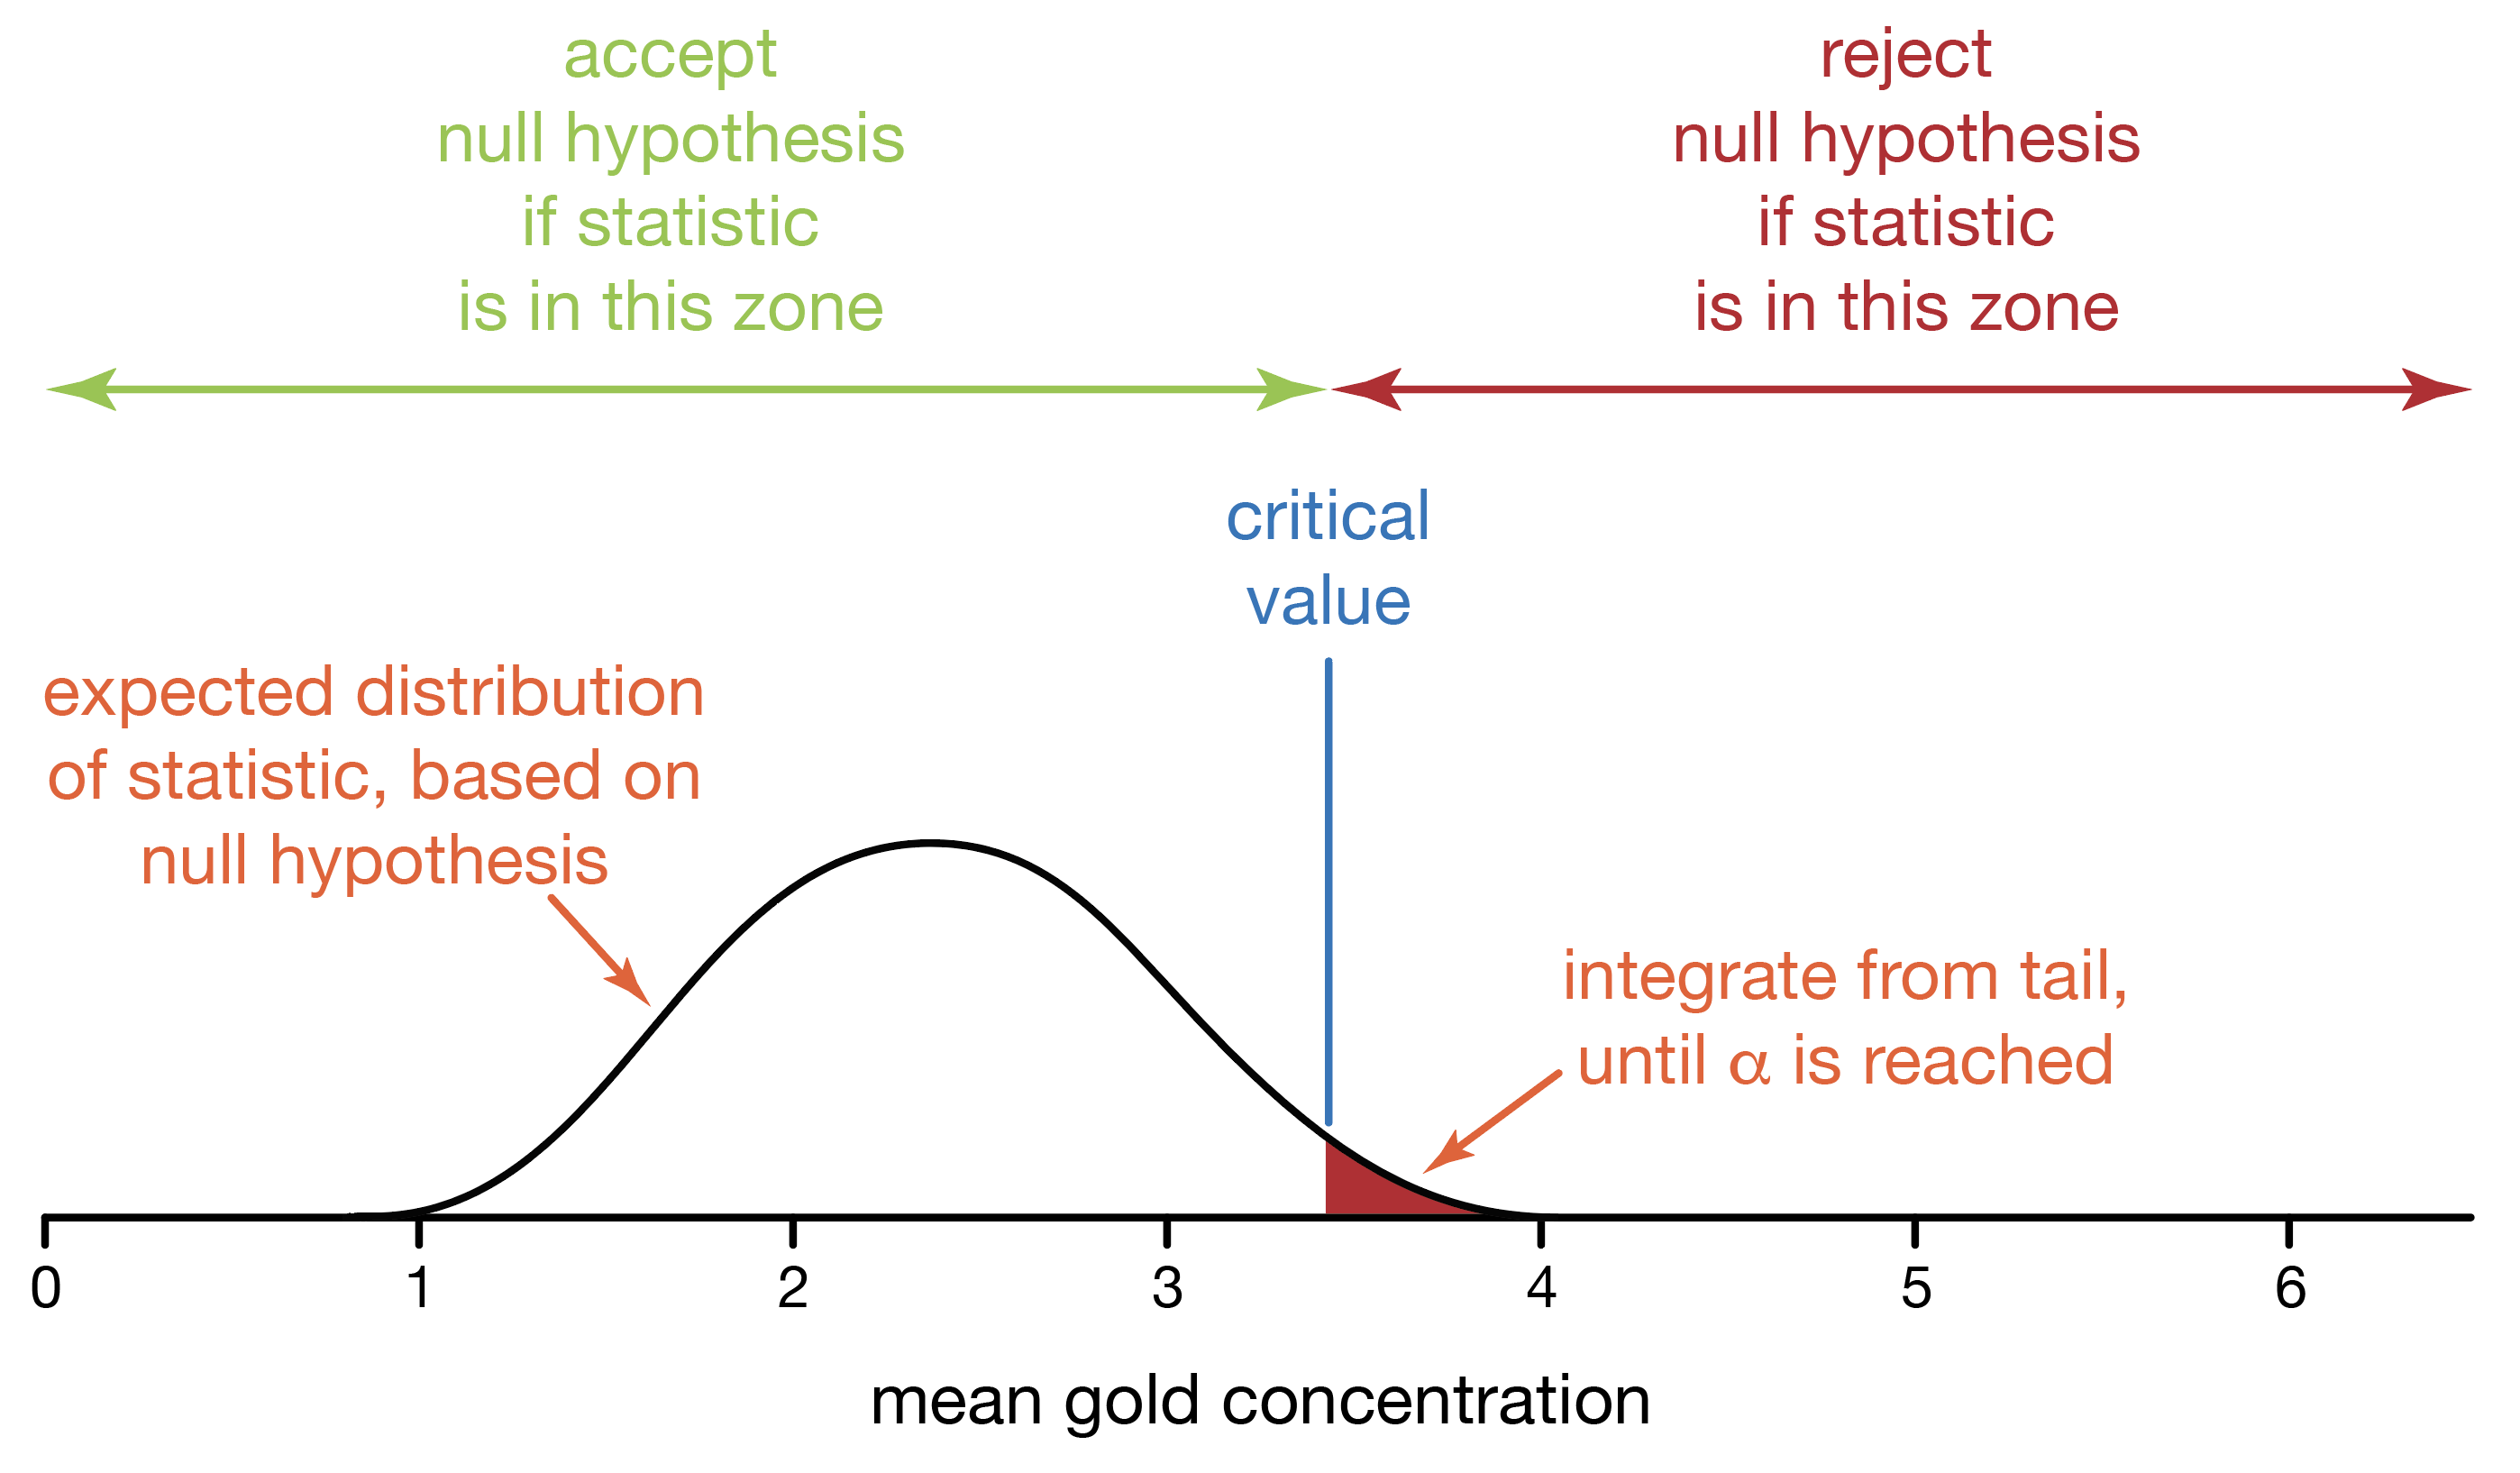

In [ ]:
#Running the example prints the test statistic value of -16.
#Importante aclarar que con 99% debemos asegurar. 
# Cuanto más negativa sea esta estadística, es más probable que rechacemos la hipótesis nula (tenemos un conjunto de datos estacionario).
# obtenemos una tabla de búsqueda para ayudar a determinar la estadística ADF.
# Podemos ver que nuestro valor estadístico de -16 es menor que el valor de -3,43 al 1%.
# Esto sugiere que podemos rechazar la hipótesis nula con un nivel de significancia
# menor del 1% (es decir, una probabilidad baja de que el resultado sea una casualidad estadística).

dftest

(-16.05147077671254,
 5.768292432873097e-29,
 38,
 9955,
 {'1%': -3.4310070554484553,
  '10%': -2.5669245637538687,
  '5%': -2.8618303792785476})

In [ ]:
#ARIMA
#Sarimax

p = d = q = range(0, 2)

In [ ]:
#Creamos lista de parametros usando itertool
#que itera entre el rango que dijimos.

pdq = list(itertools.product(p, d, q))
#Cuando tratamos con efectos estacionales, utilizamos el ARIMA estacional,
#que se denota como SARIMA (p, d, q) (P, D, Q) s. Aquí, (p, d, q) son las no estacionales
# los parámetros descritos anteriormente, mientras que (P, D, Q) siguen la misma definición pero son
#aplicado al componente estacional de la serie temporal.
# El término s es la periodicidad de la serie temporal (4 para períodos trimestrales, 12 para períodos anuales, etc.).
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
print('Ejemplos de combinaciones de parametros para ARIMA')
print(f'SARIMAX:{pdq[1]} x {seasonal_pdq[1]}')
print(f'SARIMAX:{pdq[1]} x {seasonal_pdq[2]}')
print(f'SARIMAX:{pdq[2]} x {seasonal_pdq[3]}')
print(f'SARIMAX:{pdq[2]} x {seasonal_pdq[4]}')

Ejemplos de combinaciones de parametros para ARIMA
SARIMAX:(0, 0, 1) x (0, 0, 1, 12)
SARIMAX:(0, 0, 1) x (0, 1, 0, 12)
SARIMAX:(0, 1, 0) x (0, 1, 1, 12)
SARIMAX:(0, 1, 0) x (1, 0, 0, 12)


In [ ]:
#Akaike Information Criteria
# el AIC (criterio de información de Akaike) es un estimador de la calidad 
# relativa de los modelos estadísticos para un conjunto de datos dado. 
# Dada una colección de modelos para los datos, AIC estima la calidad de cada 
# modelo, en relación con cada uno de los otros modelos. 
# Cuanto menor sea el valor de AIC, mejor.
for param in pdq:
    for param_estacionales  in seasonal_pdq:
        try:
          #USAMOS SARIMAX y enviamos parametros,
          #Si transformar o no los parámetros de AR para hacer cumplir la estacionariedad 
  #en el componente autorregresivo del modelo. El valor predeterminado es Verdadero
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_estacionales,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print(f'ARIMA {param} x {param_estacionales}12 - AIC:{results.aic}')
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 - AIC:1465.324747812899
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 - AIC:477.71701309202774
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 - AIC:497.2314433418337


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (1, 0, 1, 12)12 - AIC:1251.9866263898775
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 - AIC:720.9252270758102
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 - AIC:2902.0056507195513
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 - AIC:466.56074298091676


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 1) x (1, 0, 0, 12)12 - AIC:499.5702446844217
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 - AIC:2400.364309996122
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 - AIC:319.9884876946871
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 - AIC:677.894766859465


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (0, 0, 1, 12)12 - AIC:1467.7189761276309
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 - AIC:486.63785671879367
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 - AIC:497.78896630044073


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (1, 0, 1, 12)12 - AIC:1024.367167837936
ARIMA (0, 1, 0) x (1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA (0, 1, 1) x (0, 0, 0, 12)12 - AIC:649.9056176817456
ARIMA (0, 1, 1) x (0, 0, 1, 12)12 - AIC:2623.736390923739
ARIMA (0, 1, 1) x (0, 1, 0, 12)12 - AIC:458.8705548482636
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 - AIC:486.1832977442739
ARIMA (0, 1, 1) x (1, 0, 1, 12)12 - AIC:2845.1395120221937
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 - AIC:310.757436841719
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 - AIC:692.1645522067712
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 - AIC:1410.1149571960532
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 - AIC:479.46321478521355


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (1, 0, 0, 12)12 - AIC:480.9259367935196


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (1, 0, 1, 12)12 - AIC:1114.2026757573515
ARIMA (1, 0, 0) x (1, 1, 0, 12)12 - AIC:304.46646750846014
ARIMA (1, 0, 1) x (0, 0, 0, 12)12 - AIC:665.7794442185216
ARIMA (1, 0, 1) x (0, 0, 1, 12)12 - AIC:326397302.97901773
ARIMA (1, 0, 1) x (0, 1, 0, 12)12 - AIC:468.36851958141426
ARIMA (1, 0, 1) x (1, 0, 0, 12)12 - AIC:482.57633238769296


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (1, 0, 1, 12)12 - AIC:nan
ARIMA (1, 0, 1) x (1, 1, 0, 12)12 - AIC:306.0156002152007
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 - AIC:1377.701968220998
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 - AIC:479.2003422281135


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 0) x (1, 0, 0, 12)12 - AIC:475.3403658784892


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 0) x (1, 0, 1, 12)12 - AIC:1451.3058168699715
ARIMA (1, 1, 0) x (1, 1, 0, 12)12 - AIC:300.6270901345398
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 - AIC:649.0318019835429


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 1) x (0, 0, 1, 12)12 - AIC:nan
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 - AIC:460.4762687609859
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 - AIC:469.5250354660892


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 1) x (1, 0, 1, 12)12 - AIC:nan
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 - AIC:297.7875439536804


In [ ]:
#ARIMA (1, 1, 1) x (1, 1, 0, 12)12 - AIC:297.7875439864284
#Este es el que tiene el IAC más bajo, por lo tanto es el  más ótimo

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,                            
                                enforce_invertibility=False)
#GEnera y guarda el modelo en resultados
resultados = mod.fit()
print(resultados.summary().tables[1])

#Lof Likelihood: That means that this regression is a better fit of the data.
#Término uno de SARIMA tiene coeficiente de -1


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0274      0.255      0.108      0.914      -0.472       0.527
ar.S.L12      -0.2750      0.135     -2.031      0.042      -0.540      -0.010
sigma2      2.531e+04   1.03e+04      2.454      0.014    5093.738    4.55e+04


In [ ]:
# El resumen que resulta de la salida de SARIMAX devuelve una cantidad significativa de información,
#pero centraremos nuestra atención en la tabla de coeficientes. La columna de coef
# muestra el peso (es decir, la importancia) de cada característica y cómo cada una afecta la serie temporal.
#La P> | z | columna nos informa de la importancia de cada característica ponderada.
# Aquí, cada peso tiene un valor p menor o cercano a 0.05, por lo que es razonable retenerlos todos en nuestro modelo.

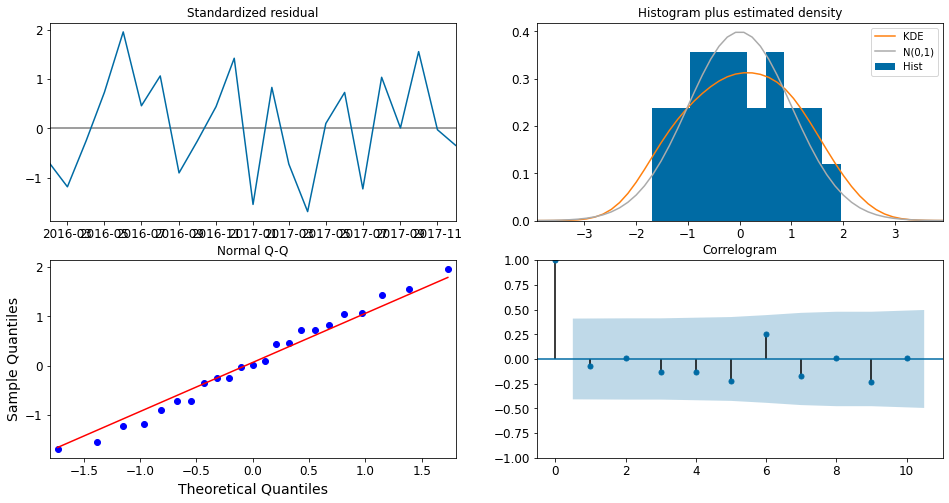

In [ ]:
resultados.plot_diagnostics(figsize=(16, 8))
#Importante tener los Standarized residual cerca de 0, son los residuos 
#estandarizados para una mejor comprensión
#
plt.show()
# Nuestra principal preocupación es asegurarnos de que los residuos de nuestro modelo no estén correlacionados 
  #y estén distribuidos normalmente con media cero. 
  #Si el modelo ARIMA estacional no satisface estas propiedades, es una buena indicación de que se puede mejorar aún más.
# En el gráfico superior derecho, vemos que la línea roja de KDE sigue de cerca a la línea N (0,1) 
  # (donde N (0,1)) es la notación estándar para una distribución normal con media 0 y desviación estándar de 1 ).
  #Ésta es una buena indicación de que los residuos se distribuyen normalmente.
#De la gráfica Q-Q normal, podemos ver que casi tenemos una línea recta,
  #lo que sugiere una desviación sistemática de la normalidad.
#Además, el correlograma de la parte inferior derecha sugiere que
  #no hay autocorrelación en los residuos, por lo que son efectivamente ruido blanco.


In [ ]:
#usamos get_prediction para predecir los datos
predicciones = resultados.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = predicciones.conf_int()



In [ ]:
pred_ci

,lower Sales,upper Sales
Order Date,,
2017-01-01,331.914617,955.532716
2017-02-01,83.995369,707.613468
2017-03-01,348.416864,972.034963
2017-04-01,410.859355,1034.477454
2017-05-01,350.863181,974.481280
2017-06-01,398.545029,1022.163128
2017-07-01,446.636134,1070.254233
2017-08-01,380.946933,1004.565032
2017-09-01,896.398786,1520.016885


Explaining seasonal patterns in sales

Predicting the expected number of incoming or churning customers

Estimating the effect of a newly launched product on number of sold units

Detecting unusual events and estimating the magnitude of their effect

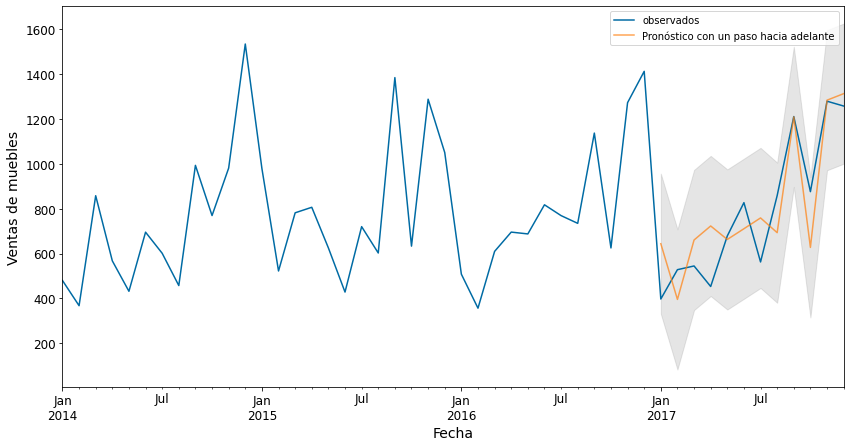

In [ ]:
#Graficamos neustra predicción
#Usamos los indices para entrar a los que anteriormente usamos y mostrarlos sombreados
ax = y['2014':].plot(label='observados')
predicciones.predicted_mean.plot(ax=ax, label='Pronóstico con un paso hacia adelante', alpha=.7, figsize=(14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color='gray',
                alpha=0.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas de muebles')
plt.legend()
plt.show()


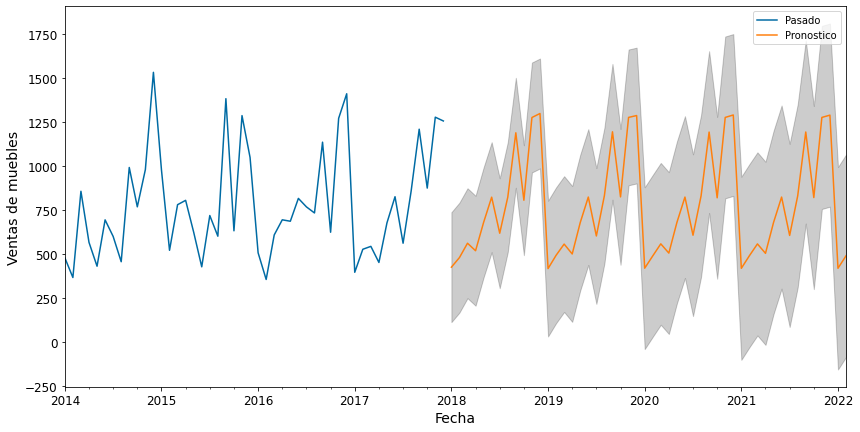

In [ ]:
#Obtenemos el forecaste 
#Usamots steps=50, permite forecastear proximos 5 años
prediccion_futuro = resultados.get_forecast(steps=50)
pred_ci = prediccion_futuro.conf_int()
ax = y.plot(label='Pasado', figsize=(14,7))
prediccion_futuro.predicted_mean.plot(ax=ax, label='Pronostico')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color='k',
                alpha=0.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas de muebles')
plt.legend()
plt.show()